In [1]:
import pandas as pd
import json
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import tree
# import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

In [2]:
def renameColumns_d(df):
    df.columns = ['code', 'name', 'year', 'month', 'day',
                  'TMAX', 'STMAX', 'TMIN', 'STMIN', 'T', 'ST', 'TMNG', 'STMNG',
                  'OpadySum', 'SOpady', 'OpadyTyp', 'WysSnieg', 'SWysSnieg']

In [3]:
def renameColumns_d_t(df):
    df.columns = ['code', 'name', 'year', 'month', 'day', 'T', 'ST',
                  'WLGS', 'SWLGS', 'FWS', 'SFWS', 'NOS', 'SNOS']

In [4]:
def addWeekDay(df):
    df['weekDay'] = df.apply(
        lambda row: 1 + ((int(row['day']) + (2 if int(row['month']) == 3 else 5)) % 7),
    axis = 1)

In [5]:
def removeNotWarsaw(df):
    return df[df.name.astype('str')
            .apply(lambda name: name.find('WARSZAWA-BIELANY') == 0)]

In [6]:
def whichDayPart(hour):
    if hour > 2 and hour <= 4:
        return 1
    elif hour > 4 and hour <= 6:
        return 2
    elif hour > 6 and hour <= 8:
        return 3
    elif hour > 8 and hour <= 10:
        return 4
    elif hour > 10 and hour <= 12:
        return 5
    elif hour > 12 and hour <= 14:
        return 6
    elif hour > 14 and hour <= 16:
        return 7  
    elif hour > 16 and hour <= 18:
        return 8
    elif hour > 18 and hour <= 20:
        return 9
    elif hour > 20 and hour <= 22:
        return 10 
    else:
        return 0

In [7]:
k_d_mar = pd.read_csv('data\k_d_03_2018.csv',
                      header = None, delimiter = ',', encoding = 'ANSI')

In [8]:
k_d_t_mar = pd.read_csv('data\k_d_t_03_2018.csv',
                        header = None, delimiter = ',', encoding = 'ANSI')

In [9]:
k_d_kw = pd.read_csv('data\k_d_04_2018.csv',
                     header = None, delimiter = ',', encoding = 'ANSI')

In [10]:
k_d_t_kw = pd.read_csv('data\k_d_t_04_2018.csv',
                       header = None, delimiter = ',', encoding = 'ANSI')

In [11]:
renameColumns_d(k_d_mar)
renameColumns_d(k_d_kw)
renameColumns_d_t(k_d_t_mar)
renameColumns_d_t(k_d_t_kw)

In [12]:
addWeekDay(k_d_mar)
addWeekDay(k_d_t_mar)
addWeekDay(k_d_kw)
addWeekDay(k_d_t_kw)

In [13]:
k_d_mar = removeNotWarsaw(k_d_mar)
k_d_t_mar = removeNotWarsaw(k_d_t_mar)
k_d_kw = removeNotWarsaw(k_d_kw)
k_d_t_kw = removeNotWarsaw(k_d_t_kw)

In [14]:
fileList = glob.glob("data\\rowery\\*.json")

In [15]:
df = pd.DataFrame(columns = ['month', 'day', 'hour', 'avBikes'])  
for fileName in fileList:
    if os.path.getsize(fileName) > 10000:
        with open(fileName, 'r') as json_file:
            data = json.load(json_file)
        df2 = pd.DataFrame([[
            fileName.split('\\')[2][4:6],
            fileName.split('\\')[2][6:8],
            fileName.split('\\')[2][9:11],
            data[0]['region_info']["available_bikes"]
        ]], columns = ['month', 'day', 'hour', 'avBikes'])
        df = df.append(df2)        

In [16]:
addWeekDay(df)

In [17]:
k_d = k_d_mar.append(k_d_kw)

In [18]:
k_d_t = k_d_t_mar.append(k_d_t_kw)

In [19]:
df = df.astype({'month': 'int64'})
df = df.astype({'day': 'int64'})
df = df.astype({'hour': 'int64'})
df = df.astype({'avBikes': 'float'})

In [20]:
    
df['Temp'] = df.apply(
   lambda row: k_d.loc[k_d['month'] == row['month']].loc[k_d['day'] == row['day']]['T'].values[0],
axis = 1)
df['Wind'] = df.apply(
   lambda row: k_d_t.loc[k_d_t['month'] == row['month']].loc[k_d_t['day'] == row['day']]['FWS'].values[0],
axis = 1)
df['Clouds'] = df.apply(
   lambda row: k_d_t.loc[k_d_t['month'] == row['month']].loc[k_d_t['day'] == row['day']]['NOS'].values[0],
axis = 1)
df['Rain'] = df.apply(
   lambda row: k_d.loc[k_d['month'] == row['month']].loc[k_d['day'] == row['day']]['OpadySum'].values[0],
axis = 1)

In [21]:
df['dayPart'] = df.apply(
    lambda row: whichDayPart(row['hour']), axis = 1)

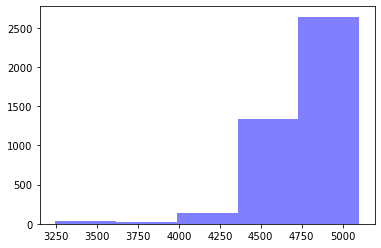

In [22]:
plt.hist(df['avBikes'], 5, facecolor='blue', alpha=0.5)
plt.show()

(array([ 431.,  716., 1293., 1305.,  432.]),
 array([-6.9 , -3.44,  0.02,  3.48,  6.94, 10.4 ]),
 <a list of 5 Patch objects>)

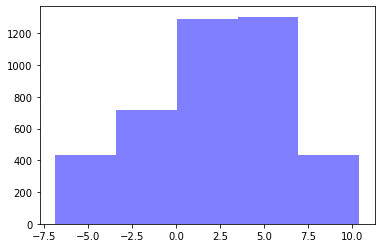

In [23]:
plt.hist(df['Temp'], 5, facecolor='blue', alpha=0.5)

(array([ 282., 1006., 1866.,  572.,  451.]),
 array([0.7, 1.7, 2.7, 3.7, 4.7, 5.7]),
 <a list of 5 Patch objects>)

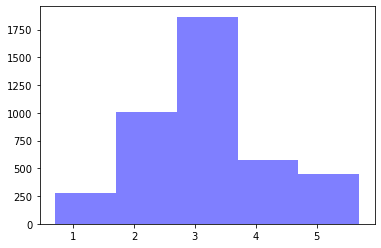

In [24]:
plt.hist(df['Wind'], 5, facecolor='blue', alpha=0.5)

(array([ 569.,  432.,  432.,  879., 1865.]),
 array([0. , 1.6, 3.2, 4.8, 6.4, 8. ]),
 <a list of 5 Patch objects>)

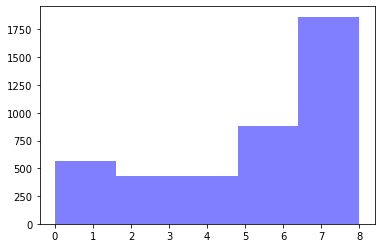

In [25]:
plt.hist(df['Clouds'], 5, facecolor='blue', alpha=0.5)

In [26]:
df['avBikes']

0    5092.0
0    5100.0
0    5100.0
0    5102.0
0    5102.0
      ...  
0    4845.0
0    4845.0
0    4845.0
0    4844.0
0    4844.0
Name: avBikes, Length: 4177, dtype: float64

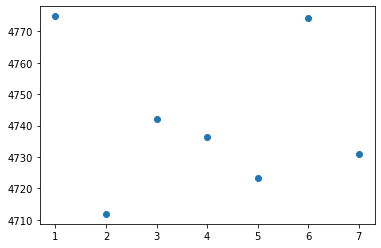

In [27]:
weekDayMean = df.groupby('weekDay').mean()['avBikes']
plt.scatter(weekDayMean.index.values, weekDayMean.values)

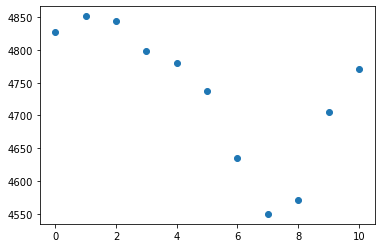

In [28]:
dayPartMean = df.groupby('dayPart').mean()['avBikes']
plt.scatter(dayPartMean.index.values, dayPartMean.values)

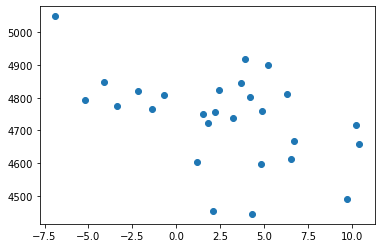

In [29]:
tempMean = df.groupby('Temp').mean()['avBikes']
plt.scatter(tempMean.index.values, tempMean.values)

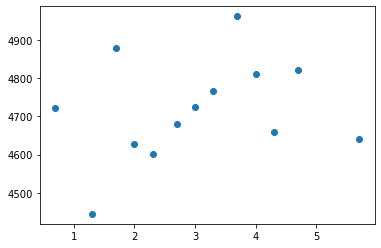

In [30]:
windMean = df.groupby('Wind').mean()['avBikes']
plt.scatter(windMean.index.values, windMean.values)

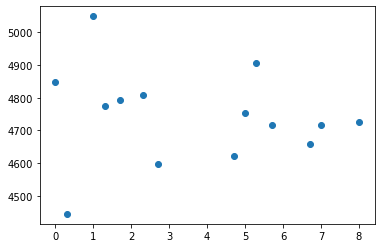

In [31]:
cloudsMean = df.groupby('Clouds').mean()['avBikes']
plt.scatter(cloudsMean.index.values, cloudsMean.values)

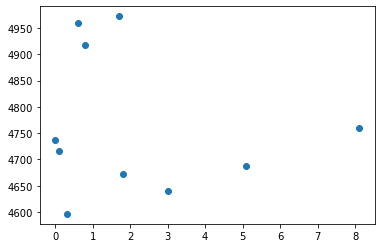

In [32]:
rainMean = df.groupby('Rain').mean()['avBikes']
plt.scatter(rainMean.index.values, rainMean.values)

In [33]:
df['logY'] = df.apply(
    lambda row: np.log(row['avBikes']), axis = 1)

In [34]:
df = df[np.abs(df.Rain-df.Rain.mean()) <= (3*df.Rain.std())]
df

,month,day,hour,avBikes,weekDay,Temp,Wind,Clouds,Rain,dayPart,logY
0,3,4,0,5092.0,7,-6.9,1.7,1.0,0.0,0,8.535426
0,3,4,0,5100.0,7,-6.9,1.7,1.0,0.0,0,8.536996
0,3,4,0,5100.0,7,-6.9,1.7,1.0,0.0,0,8.536996
0,3,4,0,5102.0,7,-6.9,1.7,1.0,0.0,0,8.537388
0,3,4,0,5102.0,7,-6.9,1.7,1.0,0.0,0,8.537388
...,...,...,...,...,...,...,...,...,...,...,...
0,4,2,2,4845.0,1,3.7,4.7,5.3,0.0,0,8.485703
0,4,2,2,4845.0,1,3.7,4.7,5.3,0.0,0,8.485703
0,4,2,2,4845.0,1,3.7,4.7,5.3,0.0,0,8.485703
0,4,2,2,4844.0,1,3.7,4.7,5.3,0.0,0,8.485496


In [ ]:
x = df[['weekDay', 'dayPart', 'Temp', 'Rain', 'Wind', 'Clouds', 'hour']]
y = df['avBikes']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [ ]:
regr = linear_model.LinearRegression(normalize = True)
regr.fit(x_train,y_train)
y_pred_train = regr.predict(x_train)
y_pred_test = regr.predict(x_test)

In [ ]:
print(sklearn.metrics.mean_absolute_error(y_train, y_pred_train))
print(sklearn.metrics.r2_score(y_train, y_pred_train))
print(sklearn.metrics.mean_absolute_error(y_test, y_pred_test))
print(sklearn.metrics.r2_score(y_test, y_pred_test))

In [ ]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(x_train)
X_test = poly.fit_transform(x_test)
X = poly.fit_transform(x)

In [ ]:
regr = linear_model.LinearRegression(normalize = True)
regr.fit(X_train,y_train)
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

In [ ]:
print(sklearn.metrics.mean_absolute_error(y_train, y_pred_train))
print(sklearn.metrics.r2_score(y_train, y_pred_train))
print(sklearn.metrics.mean_absolute_error(y_test, y_pred_test))
print(sklearn.metrics.r2_score(y_test, y_pred_test))
print(sklearn.metrics.r2_score(y_test, y_pred_test))

In [ ]:
df